# Notebook usado para o tratamento dos dados coletados na raspagem web

Os dados coletados são do site Rolling Stones e tratam-se de uma lista com os 500 melhores álbuns lançados até hoje segundo alguns especialistas do site.

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importando a base de dados
df = pd.read_csv('melhores_albuns.csv', sep=',')

In [3]:
df

,posicao,artista,album,ano
0,500,Arcade Fire,Funeral,(2004)
1,499,Rufus,Ask Rufus,(1977)
2,498,Suicide,Suicide,(1977)
3,497,Vários Artistas,The Indestructible Beat of Soweto,(1985)
4,496,Shakira,Dónde Están los Ladrones,(1998)
...,...,...,...,...
495,5,The Beatles,'Abbey Road',(1969)
496,4,Stevie Wonder,'Songs in the Key of Life',(1976)
497,3,Joni Mitchell,'Blue',(1971)
498,2,The Beach Boys,'Pet Sounds',(1966)


In [4]:
# Como na coleta alguns dados continham caracteres especiais, aqui é feita a limpeza deles
df['ano'] = df['ano'].str.replace('(','')
df['ano'] = df['ano'].str.replace(')','')
df['album'] = df['album'].str.replace('\'','')

C:\Users\marie\AppData\Local\Temp\ipykernel_41832\334473229.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['ano'] = df['ano'].str.replace('(','')
C:\Users\marie\AppData\Local\Temp\ipykernel_41832\334473229.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['ano'] = df['ano'].str.replace(')','')


In [5]:
df

,posicao,artista,album,ano
0,500,Arcade Fire,Funeral,2004
1,499,Rufus,Ask Rufus,1977
2,498,Suicide,Suicide,1977
3,497,Vários Artistas,The Indestructible Beat of Soweto,1985
4,496,Shakira,Dónde Están los Ladrones,1998
...,...,...,...,...
495,5,The Beatles,Abbey Road,1969
496,4,Stevie Wonder,Songs in the Key of Life,1976
497,3,Joni Mitchell,Blue,1971
498,2,The Beach Boys,Pet Sounds,1966


In [6]:
# Ordenando o dataframe de forma crescente
df_ordenado = df.sort_values(by='posicao')

In [7]:
df_ordenado

,posicao,artista,album,ano
499,1,Marvin Gaye,Whats Going On,1971
498,2,The Beach Boys,Pet Sounds,1966
497,3,Joni Mitchell,Blue,1971
496,4,Stevie Wonder,Songs in the Key of Life,1976
495,5,The Beatles,Abbey Road,1969
...,...,...,...,...
4,496,Shakira,Dónde Están los Ladrones,1998
3,497,Vários Artistas,The Indestructible Beat of Soweto,1985
2,498,Suicide,Suicide,1977
1,499,Rufus,Ask Rufus,1977


In [8]:
# Salvando o dataframe tratado
df_ordenado.to_csv("dados.csv", index=False)

In [9]:
df_ordenado['ano'].value_counts()

1970    23
1971    22
1972    22
1969    20
1975    18
        ..
1960     1
1955     1
1957     1
1956     1
2009     1
Name: ano, Length: 65, dtype: int64

A década de 70 é a que mais traz melhores álbuns lançados.

In [10]:
df_ordenado['artista'].value_counts()

The Beatles           9
The Rolling Stones    7
Bob Dylan             7
Kanye West            6
Neil Young            6
                     ..
Devo                  1
Herbie Hancock        1
Tracy Chapman         1
Dolly Parton          1
Arcade Fire           1
Name: artista, Length: 339, dtype: int64

The Beatles é o artista com mais álbuns na lista.

In [11]:
display(df_ordenado[df_ordenado['artista'] == 'The Beatles'])

,posicao,artista,album,ano
495,5,The Beatles,Abbey Road,1969
489,11,The Beatles,Revolver,1966
476,24,The Beatles,Sgt. Pepper’s Lonely Hearts Club Band,1967
471,29,The Beatles,White Album,1968
465,35,The Beatles,Rubber Soul,1965
303,197,The Beatles,Meet the Beatles!,1964
237,263,The Beatles,Hard Days Night,1964
234,266,The Beatles,Help!,1965
158,342,The Beatles,Let It Be,1970


Interessante notar nesta lista a posição do álbum *Sgt. Pepper’s Lonely Hearts Club Band* que é considerado por muitos críticos de música como a maior obra prima dos The Beatles

In [12]:
df_ordenado['ano'].max()

'2019'

Os álbuns mais recentes que constam na lista foram lançados em 2019.

In [13]:
display(df_ordenado[df_ordenado['ano'] == '2019'])

,posicao,artista,album,ano
179,321,Lana Del Rey,Norman Fucking Rockwell!,2019
103,397,Billie Eilish,Where Do We Go?,2019
41,459,Kid Cudi,Man on the Moon: The End of the Day,2019
9,491,Harry Styles,Fine Line,2019


In [14]:
df_ordenado['ano'].min()

'1955'

E o álbum mais antigo da lista foi lançado em 1955.

In [15]:
display(df_ordenado[df_ordenado['ano'] == '1955'])

,posicao,artista,album,ano
218,282,Frank Sinatra,In the Wee Small Hours,1955


<AxesSubplot:>

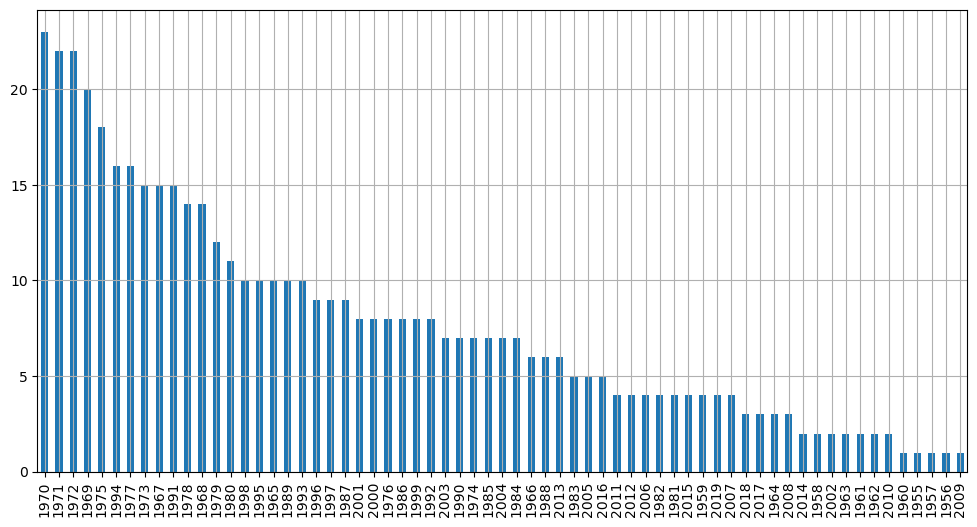

In [16]:
df_ordenado['ano'].value_counts().plot.bar(figsize=(12,6), grid=True)

In [17]:
# Criando uma lista apenas com os anos de lançamento
a = []
x = df_ordenado.sort_values(by='ano', ascending=False)

for i in x['ano']:
    a.append(i)

In [18]:
# Método para eliminar itens repetidos de uma lista
ano = list(dict.fromkeys(a))
print(ano)

['2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971', '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963', '1962', '1961', '1960', '1959', '1958', '1957', '1956', '1955']


In [19]:
# Método para coletar apenas as quantidades de lançamentos por ano
from collections import Counter

c = Counter(a)
qtde = list(c.values())
print(qtde)

[4, 3, 3, 5, 4, 2, 6, 4, 4, 2, 1, 3, 4, 4, 5, 7, 7, 2, 8, 8, 8, 10, 9, 9, 10, 16, 10, 8, 15, 7, 10, 6, 9, 8, 7, 7, 5, 4, 4, 11, 12, 14, 16, 8, 18, 7, 15, 22, 22, 23, 20, 14, 15, 6, 10, 3, 2, 2, 2, 1, 4, 2, 1, 1, 1]


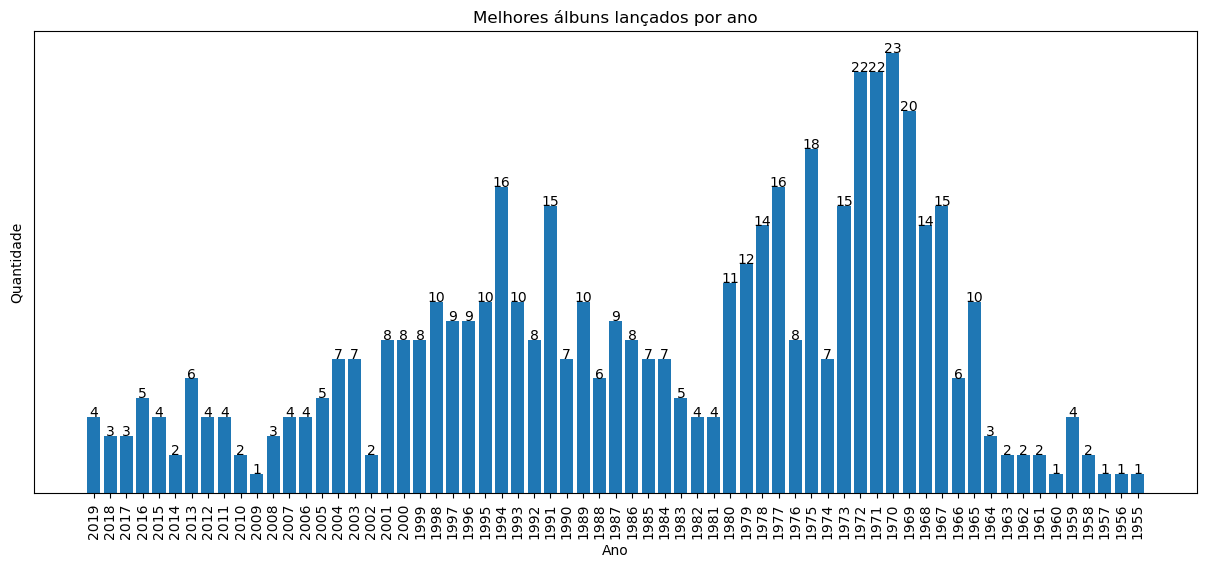

In [20]:
# Função que adiciona tags nas barras
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center')
  
# Tamanho do gráfico
plt.figure(figsize = (15,6))

# Cria o gráfico de barras
plt.bar(ano, qtde)
  
# Chama a função que adiciona as tags
addlabels(ano, qtde)

# Posiciona o conteúdo do eixo x na vertical e elimina o do eixo y
plt.xticks(rotation='vertical')
plt.yticks([])
  
# Coloca o título do gráfico
plt.title("Melhores álbuns lançados por ano")
  
# Legenda dos eixos
plt.xlabel("Ano")
plt.ylabel("Quantidade")
  
# Plota o gráfico
plt.show()


In [81]:
# Criando uma lista apenas com os artistas
b = []
y = df_ordenado.sort_values(by='artista', ascending=False)

for j in y['artista']:
    b.append(j)

In [82]:
# Eliminando os artistas repetidos de uma lista
artista = list(dict.fromkeys(b))
print(artista)

['Yo La Tengo', 'Yes', 'Yeah Yeah Yeahs', 'X-Ray Spex', 'X', 'Wu-Tang Clan', 'Wire', 'Willie Nelson', 'Wilco', 'Whitney Houston', 'Weezer', 'Vários Artistas', 'Vários', 'Various Artists', 'Van Morrison', 'Van Halen', 'Vampire Weekend', 'Usher', 'U2', 'Tracy Chapman', 'Tori Amos', 'Toots and the Maytals', 'Tom Waits', 'Tom Petty and the Heartbreakers', 'Tom Petty', 'Todd Rundgren', 'The Zombies', 'The Who', 'The White Stripes', 'The Weeknd', 'The Velvet Underground', 'The Temptations', 'The Strokes', 'The Stooges', 'The Stone Roses', 'The Smiths', 'The Smashing Pumpkins', 'The Slits', 'The Sex Pistols', 'The Roots', 'The Ronettes', 'The Rolling Stones', 'The Replacements', 'The Raincoats', 'The Pretenders', 'The Police', 'The Pharcyde', 'The Notorious B.I.G.', 'The Modern Lovers', 'The Meters', 'The Kinks', 'The Jimi Hendrix Experience', 'The Isley Brothers', 'The Go-Go’s', 'The Four Tops', 'The Flying Burrito Brothers', 'The Eagles', 'The Doors', 'The Cure', 'The Clash', 'The Cars', 'T

In [83]:
# Método para coletar apenas as quantidades de lançamentos por ano
from collections import Counter

d = Counter(b)
n_artistas = list(d.values())
print(n_artistas)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 9, 3, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 5, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 4, 2, 1, 1, 2, 1, 3, 1, 1, 2, 4, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 2, 3, 2, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 2, 2, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 6, 1, 1, 2, 4, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 3, 1, 7, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 3, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 

In [84]:
# Criando um dataset com os artistas e o número de vezes que eles aparecem na listaS
e = pd.DataFrame(list(zip(artista, n_artistas)), columns =['Artista', 'Qtde'])
e

,Artista,Qtde
0,Yo La Tengo,1
1,Yes,1
2,Yeah Yeah Yeahs,1
3,X-Ray Spex,1
4,X,1
...,...,...
335,ABBA,1
336,A Tribe Called Quest,2
337,50 Cent,1
338,2Pac,1


In [85]:
# Ordenando o dataset pelos artistas com mais aparições na lista
e_ord = e.sort_values(by='Qtde', ascending=False)
e_ord

,Artista,Qtde
63,The Beatles,9
41,The Rolling Stones,7
303,Bob Dylan,7
145,Neil Young,6
197,Kanye West,6
...,...,...
129,Patti Smith,1
127,Paul and Linda McCartney,1
125,Pearl Jam,1
124,Pet Shop Boys,1


In [86]:
# Removendo os NAN do dataset
e_ord = e_ord.dropna()
e_ord

,Artista,Qtde
63,The Beatles,9
41,The Rolling Stones,7
303,Bob Dylan,7
145,Neil Young,6
197,Kanye West,6
...,...,...
130,Patsy Cline,1
129,Patti Smith,1
127,Paul and Linda McCartney,1
125,Pearl Jam,1


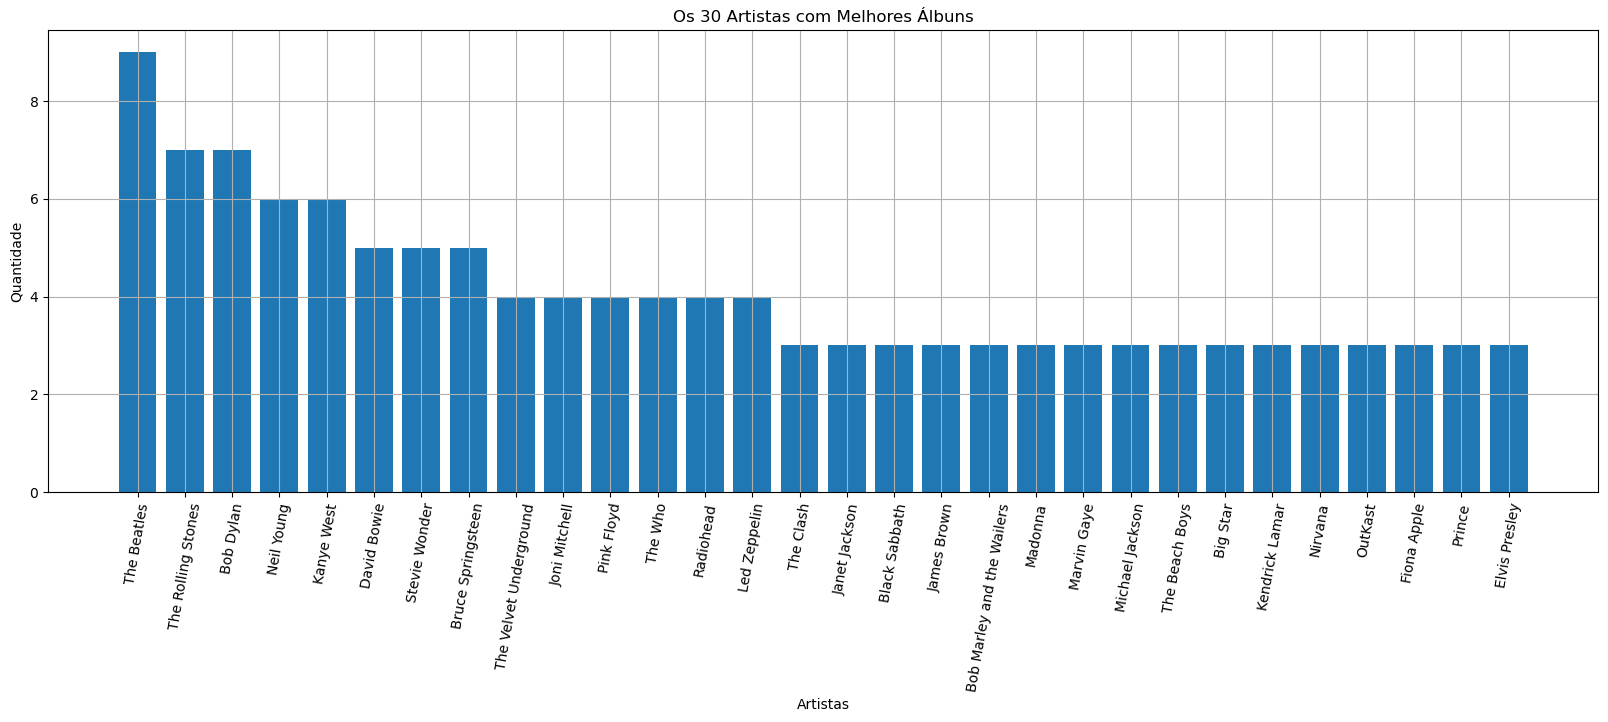

In [90]:
# Tamanho do gráfico
plt.figure(figsize = (20,6))

# Cria o gráfico de barras
plt.bar(e_ord['Artista'][0:30], e_ord['Qtde'][0:30])
  
# Posiciona o conteúdo do eixo x na vertical e elimina o do eixo y
plt.xticks(rotation=80)
  
# Coloca o título do gráfico
plt.title("Os 30 Artistas com Melhores Álbuns")
  
# Legenda dos eixos
plt.xlabel("Artistas")
plt.ylabel("Quantidade")
  
# Plota o gráfico
plt.grid()
plt.show()

Tirando (o polêmico) Kanye West, os 10 primeiros ntegrantes da lista são todos artistas clássicos que tiveram seu auge entre os anos 60 e 80.